In [1]:
import json,os, keras,jieba,time
from gensim.models import KeyedVectors,Word2Vec,word2vec
import numpy as np
from tqdm import tqdm
import threading
from keras.models import load_model
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional, Conv1D, MaxPooling1D, Flatten
import keras.backend.tensorflow_backend as TF
import tensorflow as tf
from sklearn.decomposition import pca
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pylab
pylab.rcParams['figure.figsize'] = (50.0, 50.0)

Using TensorFlow backend.
C:\Users\70953\Anaconda3\envs\python36\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [55]:
with open('./data/BosonNLP_sentiment_score.txt',mode='w',encoding='utf8') as f:
    f.write(json.dumps(swt,indent=1, ensure_ascii=False))

In [3]:
l = [1,2,3,4,5]
l[-4:],l[:-4]

([2, 3, 4, 5], [1])

In [50]:
with open('./data/train_tt.json',mode='r',encoding='utf8') as f:
    train = json.load(f)

In [2]:
help(Word2Vec)

Help on class Word2Vec in module gensim.models.word2vec:

class Word2Vec(gensim.models.base_any2vec.BaseWordEmbeddingsModel)
 |  Train, use and evaluate neural networks described in https://code.google.com/p/word2vec/.
 |  
 |  Once you're finished training a model (=no more updates, only querying)
 |  store and use only the :class:`~gensim.models.keyedvectors.KeyedVectors` instance in `self.wv` to reduce memory.
 |  
 |  The model can be stored/loaded via its :meth:`~gensim.models.word2vec.Word2Vec.save` and
 |  :meth:`~gensim.models.word2vec.Word2Vec.load` methods.
 |  
 |  The trained word vectors can also be stored/loaded from a format compatible with the
 |  original word2vec implementation via `self.wv.save_word2vec_format`
 |  and :meth:`gensim.models.keyedvectors.KeyedVectors.load_word2vec_format`.
 |  
 |  Some important attributes are the following:
 |  
 |  Attributes
 |  ----------
 |  wv : :class:`~gensim.models.keyedvectors.Word2VecKeyedVectors`
 |      This object essent

In [16]:
def trainWords():
    """读取训练集，由预训练模型分词并生成词向量"""
    with open('./dataB/train_tt.json',mode='r',encoding='utf8') as f:
        train = json.load(f)
    with open('./dataB/test_tt.json',mode='r',encoding='utf8') as f:
        test = json.load(f)
    with open('./dataC/train_tt.json',mode='r',encoding='utf8') as f:
        train_c = json.load(f)
    with open('./dataC/test_tt.json',mode='r',encoding='utf8') as f:
        test_c = json.load(f)

    with open('./dataB/weibo_with_label.json',mode='r',encoding='utf8') as f:
        weibo = json.load(f)
    data = [s['news_comment'] for s in train+train_c] # 字典转数组
    data += [s['news_comment'] for s in test+test_c]
    data += [s['news_comment'] for s in weibo]
    wvm = Word2Vec(window=8,size=200)
    wvm.build_vocab(data)
    wvm.train(data,epochs=5, total_examples=wvm.corpus_count, total_words=wvm.corpus_total_words)
    wvm.wv.save_word2vec_format('W2C/w2c5')
    print('词向量模型已保存')
    return wvm

In [5]:
# model = trainWords()
# model = KeyedVectors.load_word2vec_format('W2C/w2c')
model['']

array([-1.493827  ,  0.8421831 , -1.6865195 ,  0.19584867, -0.29569614,
        2.186382  ,  1.3492165 , -0.12231084,  0.41262868,  0.07168688,
       -0.05577846, -0.01633454,  0.498929  ,  0.2120248 ,  0.04012767,
       -0.4787214 , -1.2414836 ,  0.93190396,  0.28100243,  0.60368985,
       -0.74708045, -0.6511704 ,  0.6359643 , -0.27285045, -0.4334377 ,
        0.7481536 , -1.1059018 ,  1.3062725 ,  0.5496184 , -0.871895  ,
       -0.3952617 , -0.05731909,  0.09836569, -0.04030779, -0.08893531,
       -1.641792  , -1.029304  , -0.49865606, -2.6701162 ,  0.4774944 ,
        0.9617221 ,  0.8876972 , -0.08348282, -0.72989887,  0.4691427 ,
        0.9921788 , -0.25055283, -1.6270927 , -0.9419641 ,  0.2151349 ,
        0.618282  , -1.130891  , -0.52725327,  0.09327623, -1.0538684 ,
        0.31781736,  0.5096897 , -0.85584444,  0.7393488 , -0.89755225,
        1.5314219 ,  0.31439978,  0.5225064 ,  0.03012975, -0.10158621,
       -0.18928249, -0.03785357, -0.78202206,  0.13448516,  0.36

In [3]:
model.vectors

array([[-1.493827  ,  0.8421831 , -1.6865195 , ...,  0.293793  ,
         0.0729146 , -0.22563247],
       [ 0.20646127, -0.36391288,  2.2795303 , ..., -0.8371608 ,
         0.75760293,  1.4100641 ],
       [ 0.83206135, -1.136392  ,  1.2946693 , ..., -1.173287  ,
         0.8111882 ,  0.29829293],
       ...,
       [-0.35384938, -0.17094058, -0.3962106 , ..., -0.07884045,
        -0.04081234,  0.11173187],
       [-0.28593773,  0.30501345, -0.38333762, ..., -0.07692844,
        -0.06351432, -0.12817933],
       [-0.00848333, -0.15828833, -0.10082965, ...,  0.07039242,
        -0.00291422, -0.0335262 ]], dtype=float32)

In [10]:
help(Word2Vec)

Help on class Word2Vec in module gensim.models.word2vec:

class Word2Vec(gensim.models.base_any2vec.BaseWordEmbeddingsModel)
 |  Train, use and evaluate neural networks described in https://code.google.com/p/word2vec/.
 |  
 |  Once you're finished training a model (=no more updates, only querying)
 |  store and use only the :class:`~gensim.models.keyedvectors.KeyedVectors` instance in `self.wv` to reduce memory.
 |  
 |  The model can be stored/loaded via its :meth:`~gensim.models.word2vec.Word2Vec.save` and
 |  :meth:`~gensim.models.word2vec.Word2Vec.load` methods.
 |  
 |  The trained word vectors can also be stored/loaded from a format compatible with the
 |  original word2vec implementation via `self.wv.save_word2vec_format`
 |  and :meth:`gensim.models.keyedvectors.KeyedVectors.load_word2vec_format`.
 |  
 |  Some important attributes are the following:
 |  
 |  Attributes
 |  ----------
 |  wv : :class:`~gensim.models.keyedvectors.Word2VecKeyedVectors`
 |      This object essent

In [11]:
stop = json.load(open('./data/stop.txt','r', encoding='utf8'))

In [77]:
with open('./data/train_tt.json','r',encoding='utf8') as f:
    data = json.loads(f.read())

raw = pd.read_csv('./data/weibo_senti_100k.csv')
for i in tqdm(range(len(raw.values))):
    s = raw.iloc[i,1]
    s = list(jieba.cut(s))
    ss = [w for w in s if w not in stop]
    raw.iloc[i,1] = ' '.join(ss)
raw.to_csv('./data/weibo_with_label.csv')

In [9]:
weibo = pd.read_csv('./data/weibo_with_label.csv',index_col=0)
data = []
for i in weibo.values:
    try:
        sa = {}
        sa['news_comment'] = i[1].split(' ')
        if i[0] == 1:
            sa['polarity'] = 'positive'
        else:
            sa['polarity'] = 'negative'
        data.append(sa)
    except:
        pass
with open('./data/weibo_with_label.json', 'w',encoding='utf8') as f:
    f.write(json.dumps(data,ensure_ascii=False, indent=1))

In [103]:
with open('./data/train_tt.json',mode='w',encoding='utf8') as f:
    f.write(json.dumps(train,indent=1,ensure_ascii=False))

In [21]:
wvs = KeyedVectors.load_word2vec_format('model/self_wv_b')
words = wvs.index2entity
def getW2I():
    w2i = {}
    for i in range(len(words)):
        w2i[words[i]] = i
    return w2i
w2i = getW2I()

In [17]:
model = load_model('./model_test/add_label_f-28132959-0.704000.h5')

In [29]:
def toTest(sentences):
    """读取训练集，由预训练模型分词并生成词向量"""
    x = []
    for sentence in sentences:
        doc_vecs = []
        for w in sentence:
            if w in w2i:
                doc_vecs.append(w2i[w])
        x.append(doc_vecs)
    x = np.array(x)
    x = sequence.pad_sequences(x, maxlen=60)
    return x

In [79]:
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [81]:
f = pca.PCA(n_components=3)
w,t = [],[]
n = 1
for i in model.index2entity[10000:10300]:
    w.append(i)
    t.append(model.wv[i])


C:\Users\70953\Anaconda3\envs\python36\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


In [82]:
m = f.fit(t)


In [83]:
m = np.array(m.transform(t))

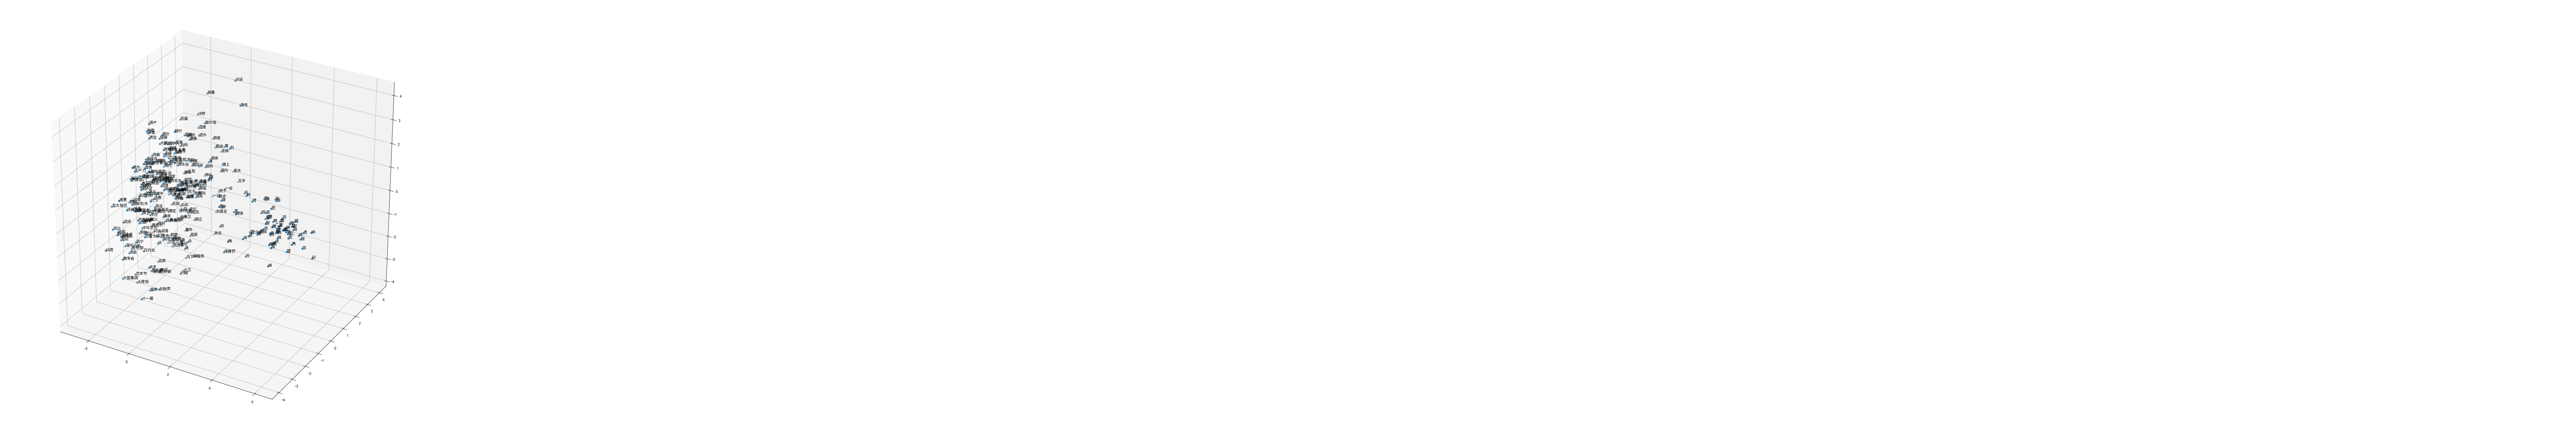

In [87]:
fg = plt.figure(figsize=(20,20))
ax = fg.gca(projection='3d')
ax.scatter3D(m[:,0],m[:,1],m[:,2],)
for i in range(len(w)):
    ax.text3D(m[i,0],m[i,1],m[i,2],w[i])

In [1]:
from keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [11]:
np.random.rand(10,3)

array([[0.82458724, 0.04189908, 0.16745321],
       [0.35584608, 0.23429124, 0.00883785],
       [0.07805447, 0.18993577, 0.81101093],
       [0.09748756, 0.94130761, 0.17853946],
       [0.85420902, 0.40234011, 0.41861936],
       [0.37543251, 0.43198057, 0.62970552],
       [0.6751461 , 0.90174077, 0.57387004],
       [0.27719321, 0.97635897, 0.69180776],
       [0.14295392, 0.97258564, 0.28388612],
       [0.34974823, 0.90655113, 0.73486315]])